In [2]:
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings


## Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [3]:
df_customer  = pd.read_csv('Mall_Customers.csv') 

In [4]:
df_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df_customer.shape

(200, 5)

In [7]:
df_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df_customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df_customer.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

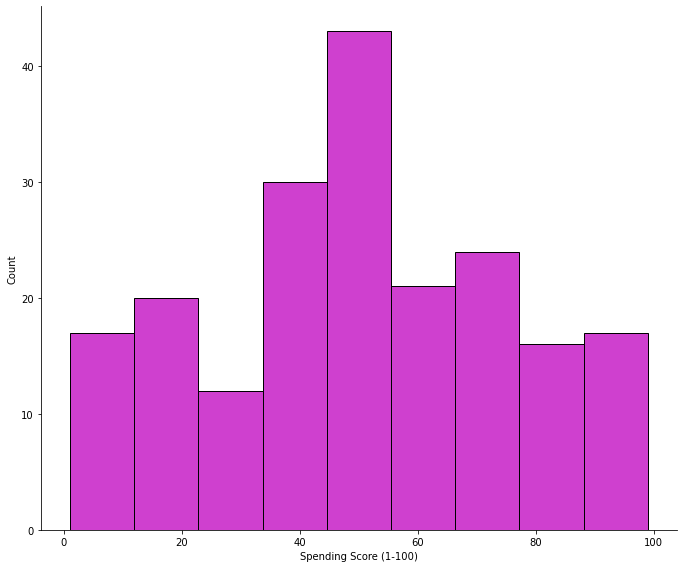

In [10]:
sns.displot(df_customer['Spending Score (1-100)'],kde = False, color='m',height=8,aspect=1.2)
plt.show()

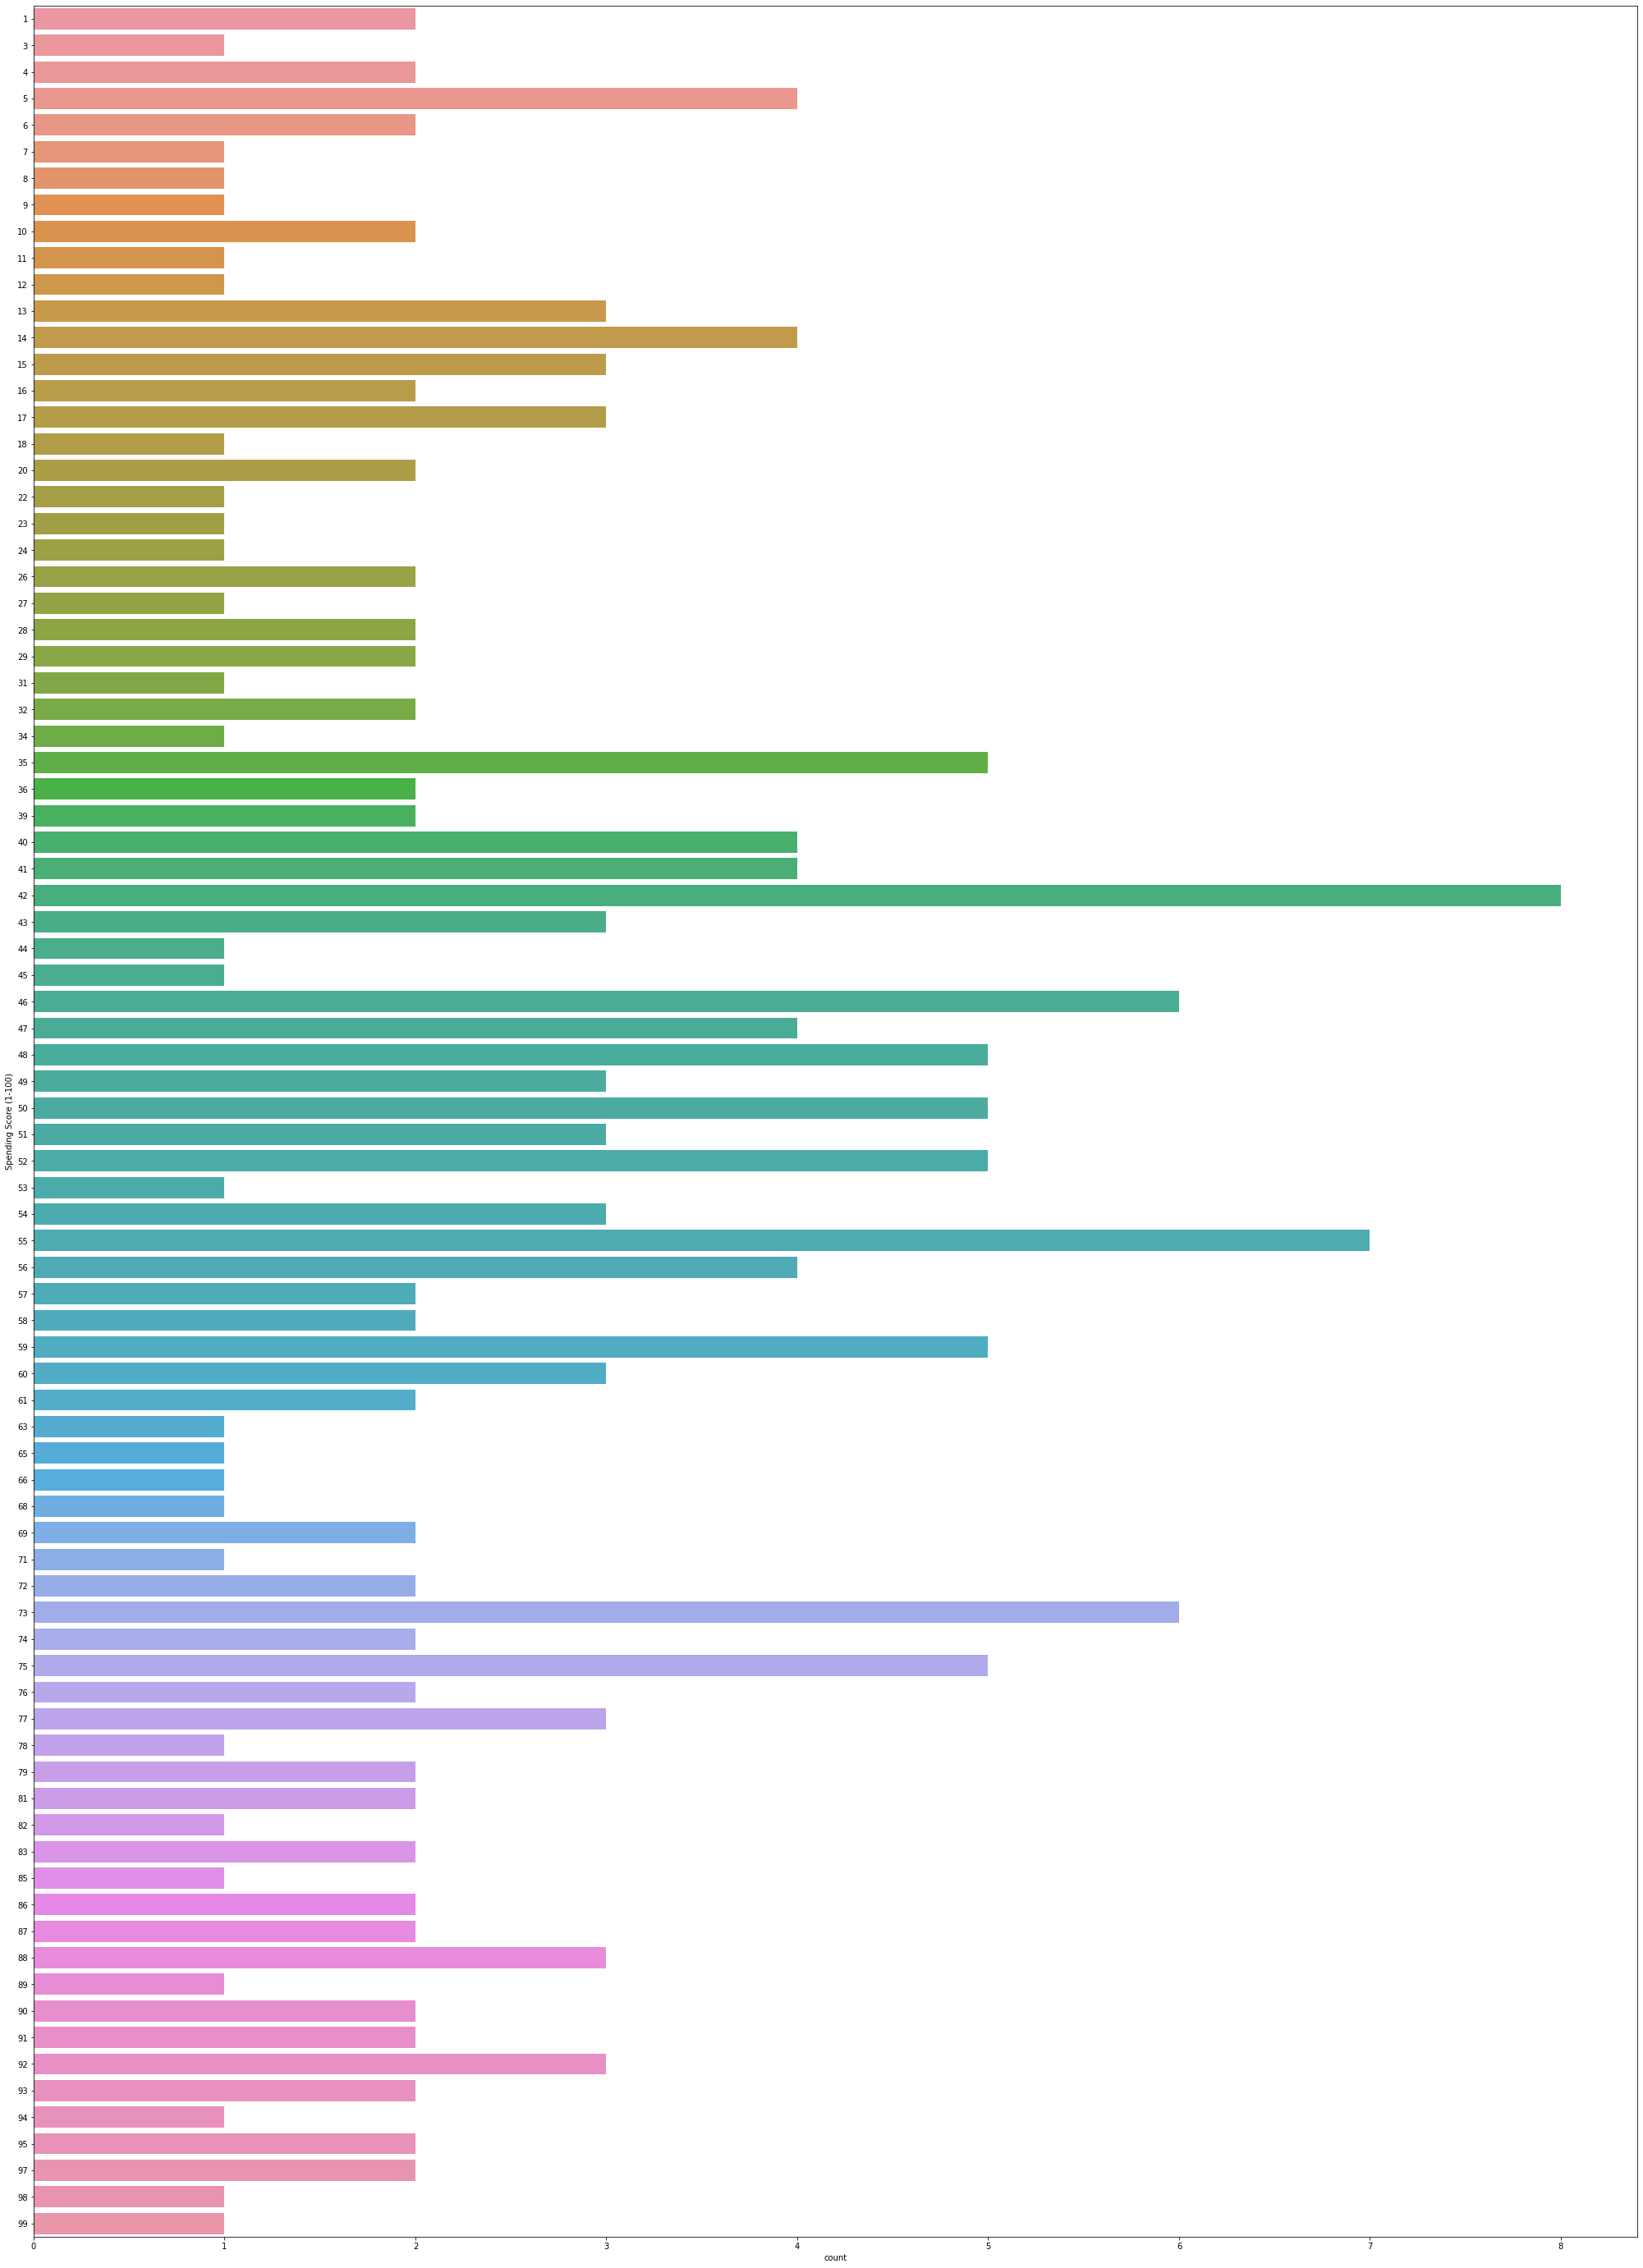

In [11]:
plt.figure(figsize=(35,50))
sns.countplot(y='Spending Score (1-100)' ,data=df_customer)
plt.show()

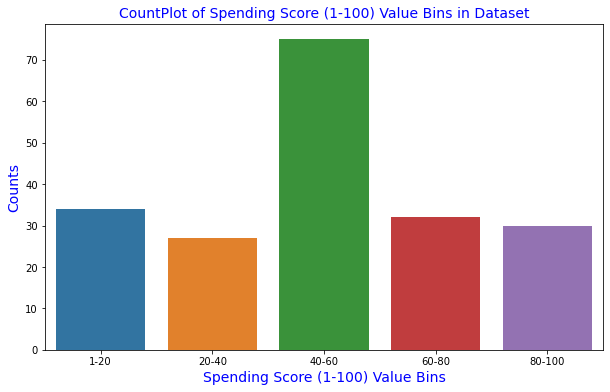

In [12]:
#y='Spending Score (1-100)'
Spending_Score = pd.cut(x=df_customer['Spending Score (1-100)'], 
                          bins=[1, 20, 40, 60, 80, 100], 
                          labels=['1-20', '20-40', '40-60', '60-80', '80-100'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=Spending_Score)
plt.title('CountPlot of Spending Score (1-100) Value Bins in Dataset', fontsize=14, c='b')
plt.xlabel('Spending Score (1-100) Value Bins', fontsize=14, c='b')
plt.ylabel('Counts', fontsize=14, c='b')
plt.show()

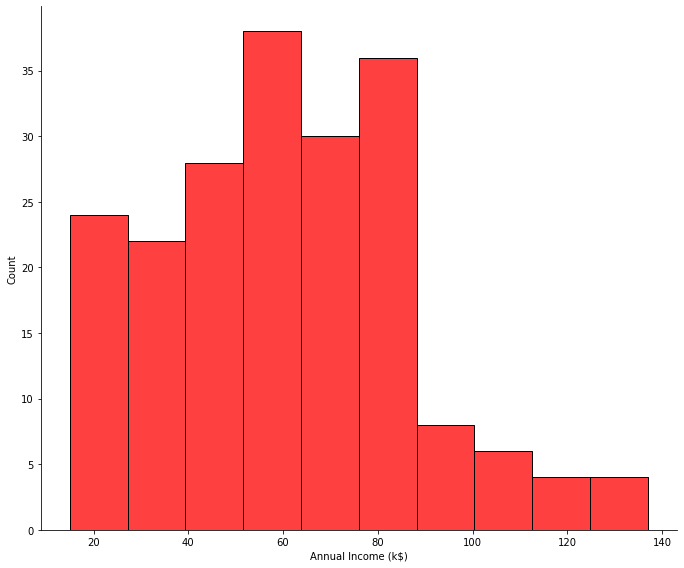

In [13]:
sns.displot(df_customer['Annual Income (k$)'],kde = False, color='r',height=8,aspect=1.2)
plt.show()

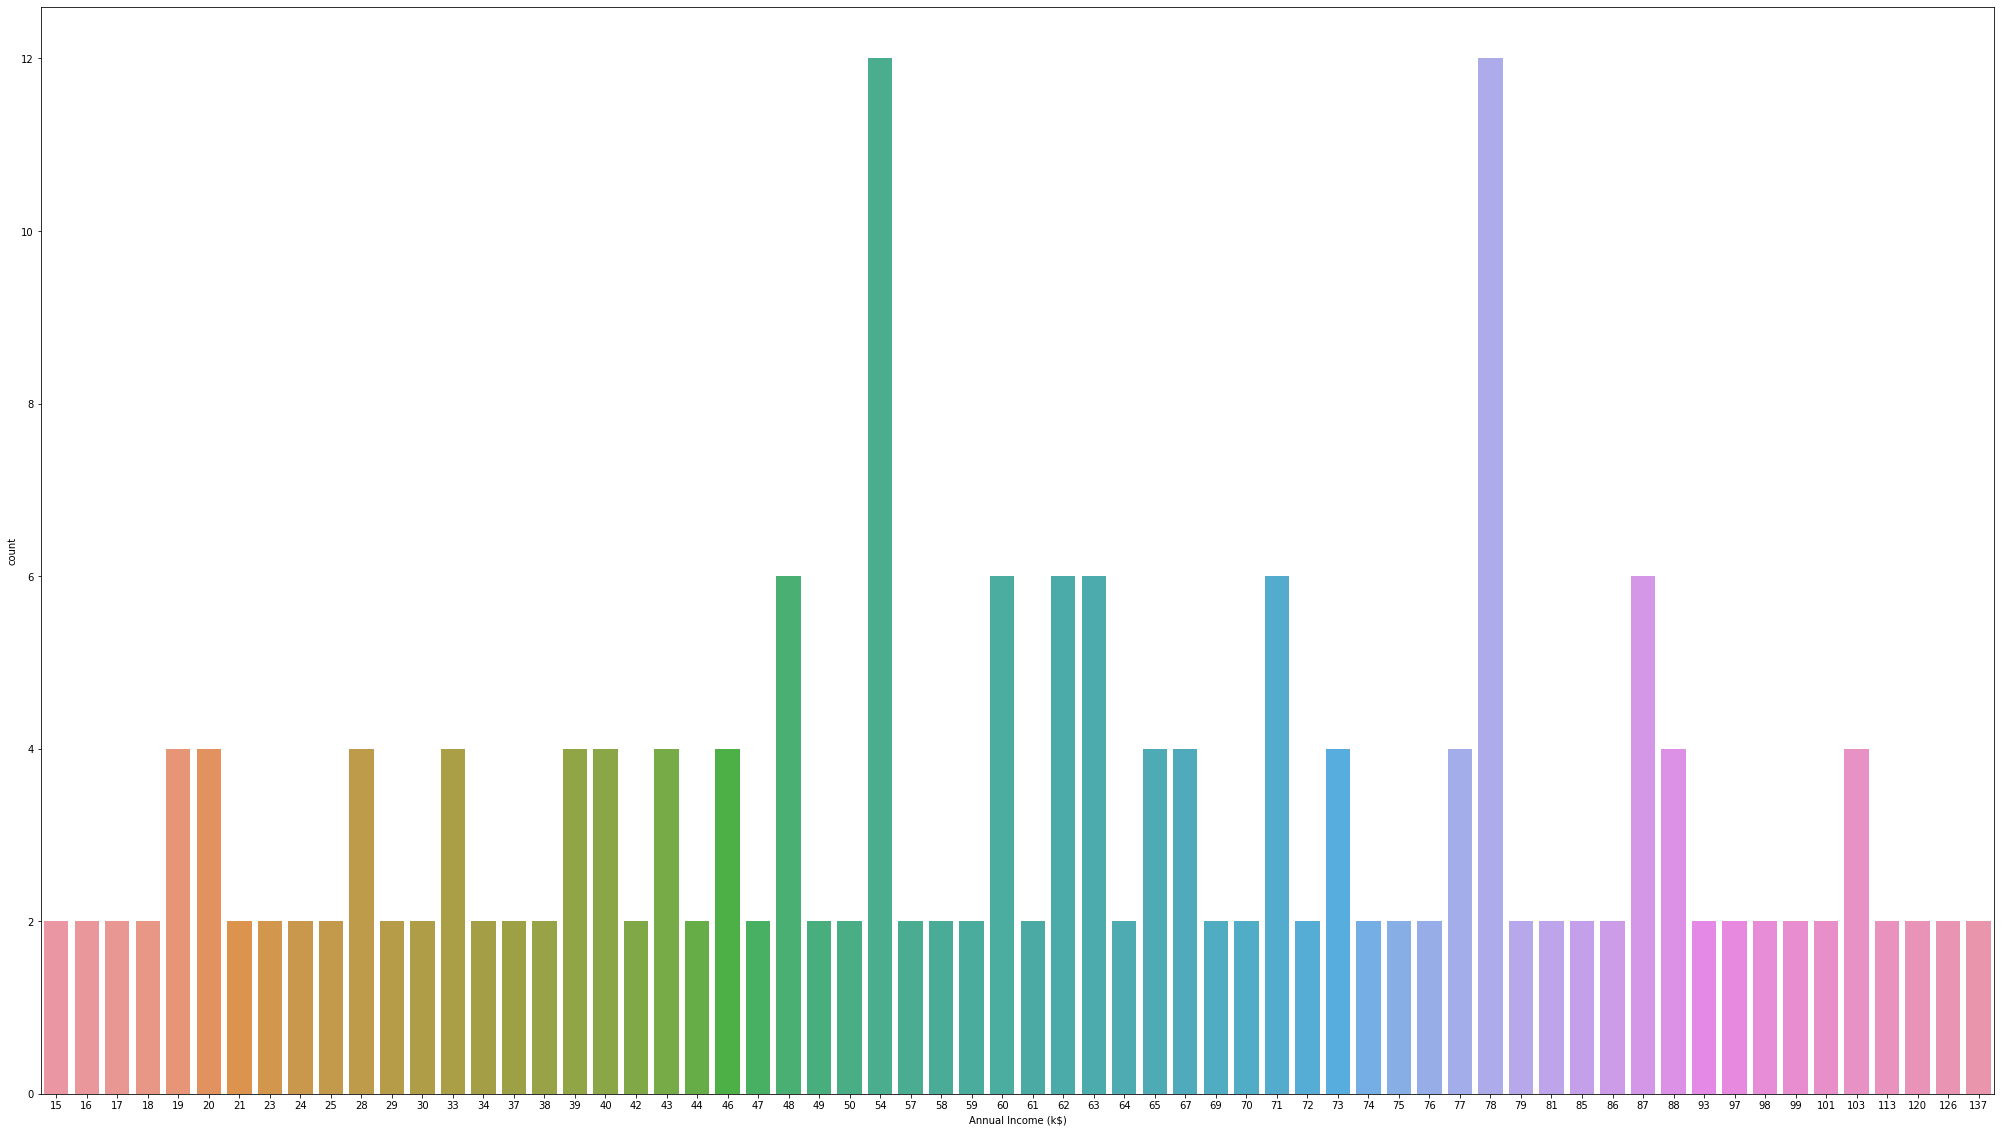

In [14]:
plt.figure(figsize=(35,20))
sns.countplot(x='Annual Income (k$)' ,data=df_customer)
plt.show()

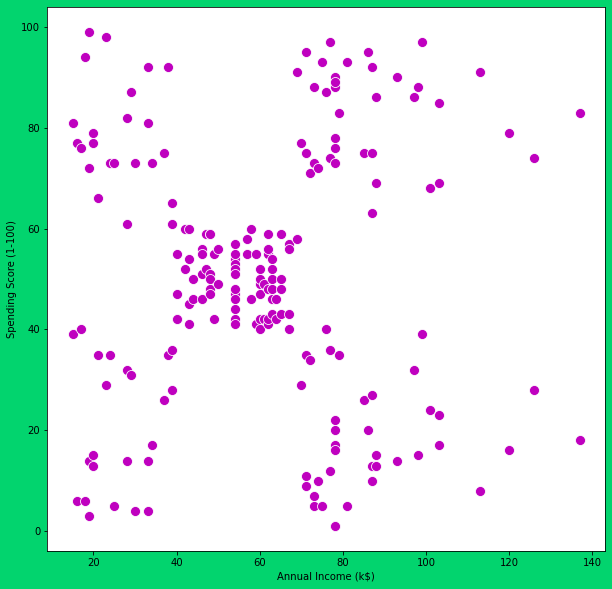

In [15]:
plt.figure(figsize=(10,10),facecolor='#02D46E')
sns.scatterplot(x='Annual Income (k$)',y ='Spending Score (1-100)',data=df_customer  ,color='m' ,s=100 )
plt.show()

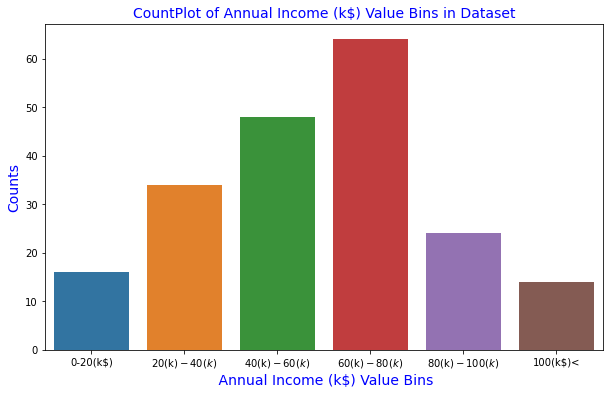

In [16]:
Annual_income  = pd.cut(x=df_customer['Annual Income (k$)'], 
                          bins=[0, 20, 40, 60, 80, 100, np.inf], 
                          labels=['0-20(k$)', '20(k$)-40(k$)', '40(k$)-60(k$)', '60(k$)-80(k$)', '80(k$)-100(k$)', '100(k$)<'])

## countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=Annual_income)
plt.title('CountPlot of Annual Income (k$) Value Bins in Dataset', fontsize=14, c='b')
plt.xlabel(' Annual Income (k$) Value Bins', fontsize=14, c='b')
plt.ylabel('Counts', fontsize=14, c='b')
plt.show()

In [17]:
# Choosing the Annual Income (k$) & Spending Score (1-100)
x = df_customer.iloc[:,[3,4]].values
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### `Choose the best number of K`

#### `Elbow Method`

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


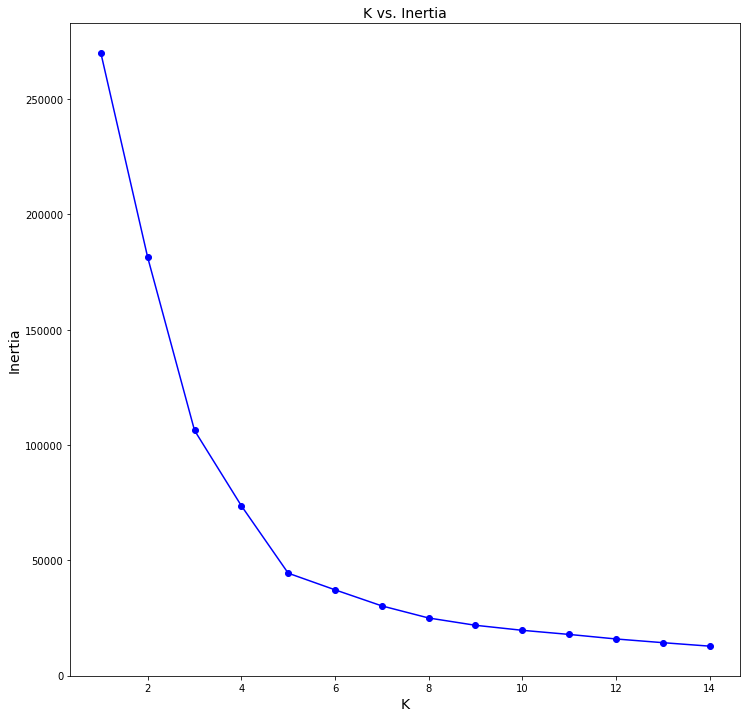

In [18]:
## Try different K and choose according to Elbow Method
k_choose = np.arange(1, 15, 1)  ## space we search in

k_with_inertia = {}

for val in k_choose:  ## loop over the space of K
    ## define the algorithm
    kmeans_each = KMeans(n_clusters=val, n_init=10, algorithm='auto', init='k-means++', random_state=42) 
    kmeans_each.fit(x) 
    #k_with_inertia.append(kmeans.inertia_)

    each_inertia = kmeans_each.inertia_   ## get the best inertia for each K
    k_with_inertia[val] = each_inertia    ## to the dictionary
    
## Plotting each K with the opposite Inertia
plt.figure(figsize=(12, 12))
plt.plot(k_with_inertia.keys(), k_with_inertia.values(), 'bo-')
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()  ### using elbow method , here k=4 is the best , but let's use other metrics to see

## Training the k-Means Clustering Model


In [19]:
Kmeans =KMeans(n_clusters=5 ,algorithm='auto', init='k-means++',random_state=42)
Kmeans.fit(x)


KMeans(n_clusters=5, random_state=42)

In [20]:
y = Kmeans.predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [21]:
distances = Kmeans.transform(x)
print('distances to each centroids => \n', distances)

distances to each centroids => 
 [[ 41.64649718  76.40173093  21.32900082  41.76478805  83.53318836]
 [ 51.13585016  97.15772995  61.1410715   10.85136241  71.54735723]
 [ 58.63497554  73.05044385  18.12673302  74.00569556 103.78428673]
 [ 47.95237978  93.80372474  57.02566331  10.01032525  70.72462827]
 [ 39.46148128  74.78767224  21.23400098  40.31948855  81.30426373]
 [ 46.56044643  92.39571065  55.8671967    9.35303902  69.80796897]
 [ 57.31383054  71.07437898  17.06930164  73.76946444 102.4354642 ]
 [ 58.04839285 104.11269404  73.55722539  16.55094814  69.55904128]
 [ 59.00333626  70.62473406  19.34504132  76.65938401 104.0322865 ]
 [ 42.69470851  88.32373199  51.60649788   9.97393297  68.29366242]
 [ 50.78372065  69.27004241  10.0570208   65.70891231  95.93172635]
 [ 61.36642514 107.20965537  78.4278412   20.75675734  69.61394436]
 [ 49.36959239  68.23276489   8.64343015  64.61794905  94.51752635]
 [ 44.73321313  90.76088792  56.44015852   6.19583971  66.73578764]
 [ 50.78809631 

### 'plotting all the clusters and their Centroids'

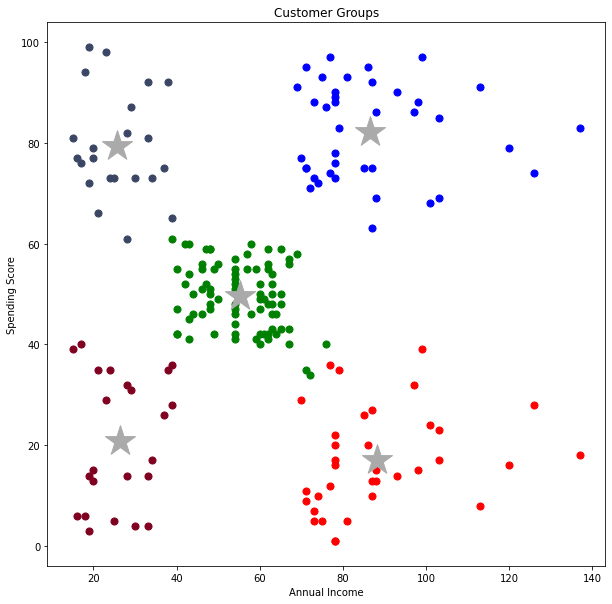

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='#800020', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='#3a4664', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')
 
#614051

# plot the centroids
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], s=1000, marker='*', c='#aaaaaa', label='Centroids' , )

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
